In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,SE,FT,Data Product Owner,170000,USD,170000,US,0,US,M
1,2025,SE,FT,Data Product Owner,110000,USD,110000,US,0,US,M
2,2025,SE,FT,Data Product Owner,170000,USD,170000,US,0,US,M
3,2025,SE,FT,Data Product Owner,110000,USD,110000,US,0,US,M
4,2025,SE,FT,Engineer,143000,USD,143000,US,0,US,M


In [20]:
df = df.drop(['salary', 'salary_currency'], axis=1)


In [21]:
#Convert salary to SAR
if 'salary_in_usd' in df.columns:
    usd_to_sar_rate = 3.75
    df['salary'] = df['salary_in_usd'] * usd_to_sar_rate
    df = df.drop('salary_in_usd', axis=1)
else:
    print("'salary_in_usd' column not found in DataFrame.")


In [22]:
#Columns to encode
columns_to_encode = ['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size']

#Add encoded columns and rearrange
for col in columns_to_encode:
    encoded_col = col + '_encoded'
    df[encoded_col] = df[col].astype('category').cat.codes

#Get the current column order
    cols = df.columns.tolist()

#Move the encoded column next to the original column
    col_index = cols.index(col)
    cols.insert(col_index + 1, cols.pop(cols.index(encoded_col)))
    df = df[cols]

df

,work_year,experience_level,experience_level_encoded,employment_type,employment_type_encoded,job_title,job_title_encoded,employee_residence,employee_residence_encoded,remote_ratio,company_location,company_location_encoded,company_size,company_size_encoded,salary
0,2025,SE,3,FT,2,Data Product Owner,133,US,88,0,US,82,M,1,637500.00
1,2025,SE,3,FT,2,Data Product Owner,133,US,88,0,US,82,M,1,412500.00
2,2025,SE,3,FT,2,Data Product Owner,133,US,88,0,US,82,M,1,637500.00
3,2025,SE,3,FT,2,Data Product Owner,133,US,88,0,US,82,M,1,412500.00
4,2025,SE,3,FT,2,Engineer,169,US,88,0,US,82,M,1,536250.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73143,2020,SE,3,FT,2,Data Scientist,142,US,88,100,US,82,L,0,1545000.00
73144,2021,MI,2,FT,2,Principal Data Scientist,236,US,88,100,US,82,L,0,566250.00
73145,2020,EN,0,FT,2,Data Scientist,142,US,88,100,US,82,S,2,393750.00
73146,2020,EN,0,CT,0,Business Data Analyst,57,US,88,100,US,82,L,0,375000.00


In [23]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73148 entries, 0 to 73147
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   work_year                   73148 non-null  int64  
 1   experience_level            73148 non-null  object 
 2   experience_level_encoded    73148 non-null  int8   
 3   employment_type             73148 non-null  object 
 4   employment_type_encoded     73148 non-null  int8   
 5   job_title                   73148 non-null  object 
 6   job_title_encoded           73148 non-null  int16  
 7   employee_residence          73148 non-null  object 
 8   employee_residence_encoded  73148 non-null  int8   
 9   remote_ratio                73148 non-null  int64  
 10  company_location            73148 non-null  object 
 11  company_location_encoded    73148 non-null  int8   
 12  company_size                73148 non-null  object 
 13  company_size_encoded        731

,work_year,experience_level_encoded,employment_type_encoded,job_title_encoded,employee_residence_encoded,remote_ratio,company_location_encoded,company_size_encoded,salary
count,73148.000000,73148.000000,73148.000000,73148.000000,73148.000000,73148.000000,73148.000000,73148.000000,7.314800e+04
mean,2023.831192,2.378384,1.998100,151.118158,82.086851,21.582955,76.571540,0.969897,5.925516e+05
std,0.477551,0.916602,0.103709,75.977281,18.843257,41.023051,17.400197,0.186555,2.718799e+05
min,2020.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.625000e+04
25%,2024.000000,2.000000,2.000000,95.000000,88.000000,0.000000,82.000000,1.000000,4.008375e+05
50%,2024.000000,3.000000,2.000000,142.000000,88.000000,0.000000,82.000000,1.000000,5.531250e+05
75%,2024.000000,3.000000,2.000000,207.000000,88.000000,0.000000,82.000000,1.000000,7.488750e+05
max,2025.000000,3.000000,3.000000,288.000000,92.000000,100.000000,85.000000,2.000000,3.000000e+06


In [24]:
print("Data dimensions:", df.shape)

null_counts = df.isnull().sum()
print("Missing values per column:\n", null_counts)

df = df.dropna()

Data dimensions: (73148, 15)
Missing values per column:
 work_year                     0
experience_level              0
experience_level_encoded      0
employment_type               0
employment_type_encoded       0
job_title                     0
job_title_encoded             0
employee_residence            0
employee_residence_encoded    0
remote_ratio                  0
company_location              0
company_location_encoded      0
company_size                  0
company_size_encoded          0
salary                        0
dtype: int64


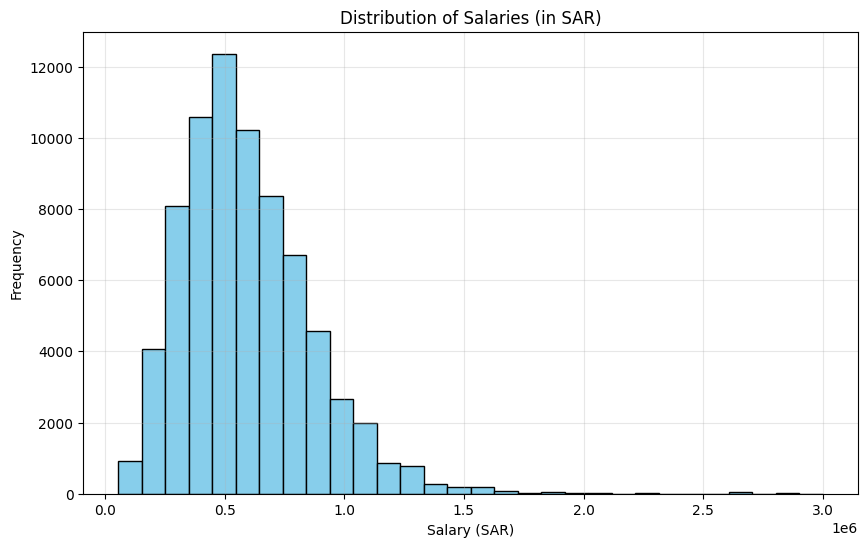

In [30]:
# Plot 1: Histogram of salary distribution
plt.figure(figsize=(10, 6))
plt.hist(df['salary'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Salaries (in SAR)')
plt.xlabel('Salary (SAR)')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)
plt.show()

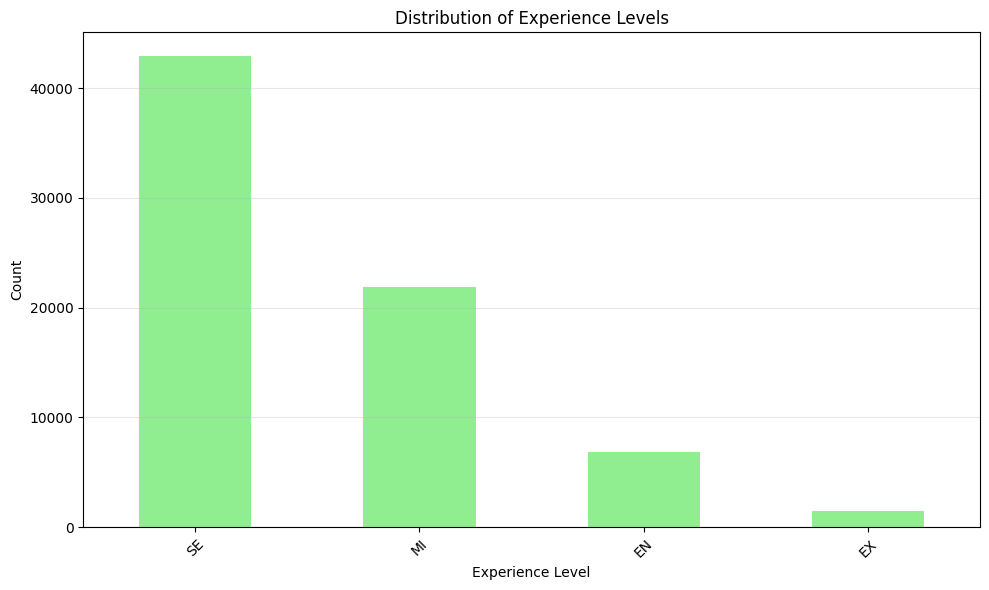

In [31]:
# Plot 2: Bar plot of experience levels
experience_counts = df['experience_level'].value_counts()
plt.figure(figsize=(10, 6))
experience_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribution of Experience Levels')
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

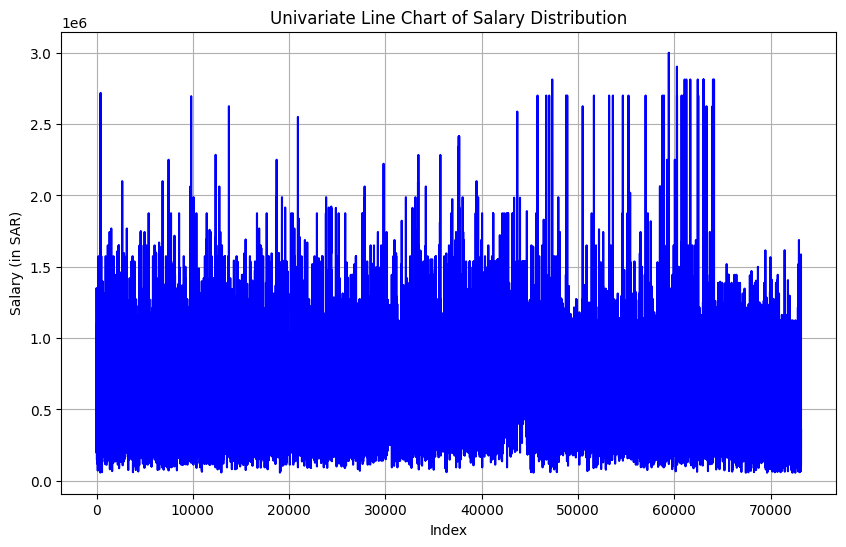

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(df['salary'], color='blue')
plt.title('Univariate Line Chart of Salary Distribution')
plt.xlabel('Index')
plt.ylabel('Salary (in SAR)')
plt.grid(True)
plt.show()

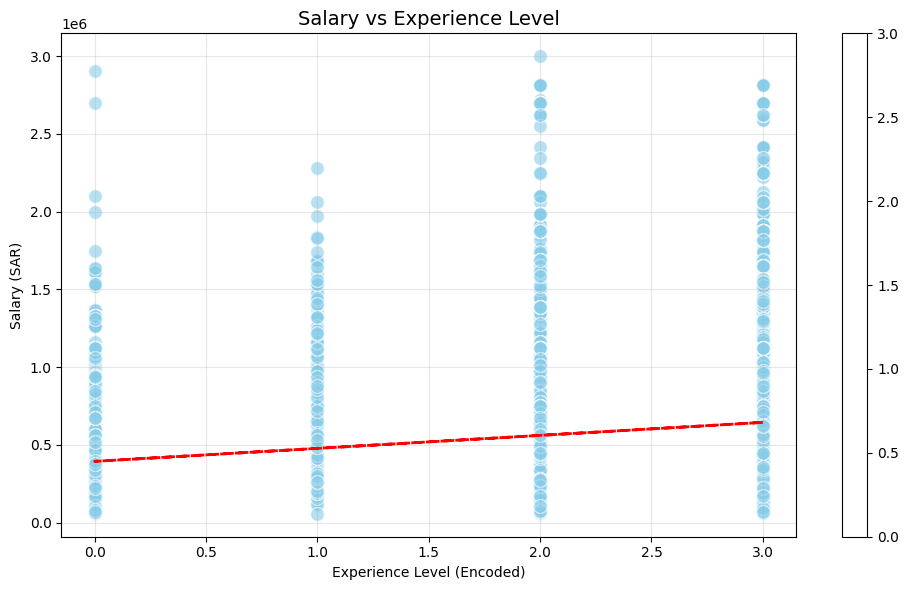

In [35]:
# Plot 1: Scatter plot - Salary vs Experience Level
plt.figure(figsize=(10, 6))
plt.scatter(df['experience_level_encoded'], df['salary'], 
            alpha=0.6, edgecolors='w', s=100, c='skyblue')

# Add trend line
z = np.polyfit(df['experience_level_encoded'], df['salary'], 1)
p = np.poly1d(z)
plt.plot(df['experience_level_encoded'], p(df['experience_level_encoded']), 
         "r--", linewidth=2)

plt.title('Salary vs Experience Level', fontsize=14)
plt.xlabel('Experience Level (Encoded)')
plt.ylabel('Salary (SAR)')
plt.grid(alpha=0.3)
plt.colorbar(plt.scatter(df['experience_level_encoded'], df['salary'], 
                         c=df['experience_level_encoded'], cmap='viridis', alpha=0.0))
plt.tight_layout()
plt.show()

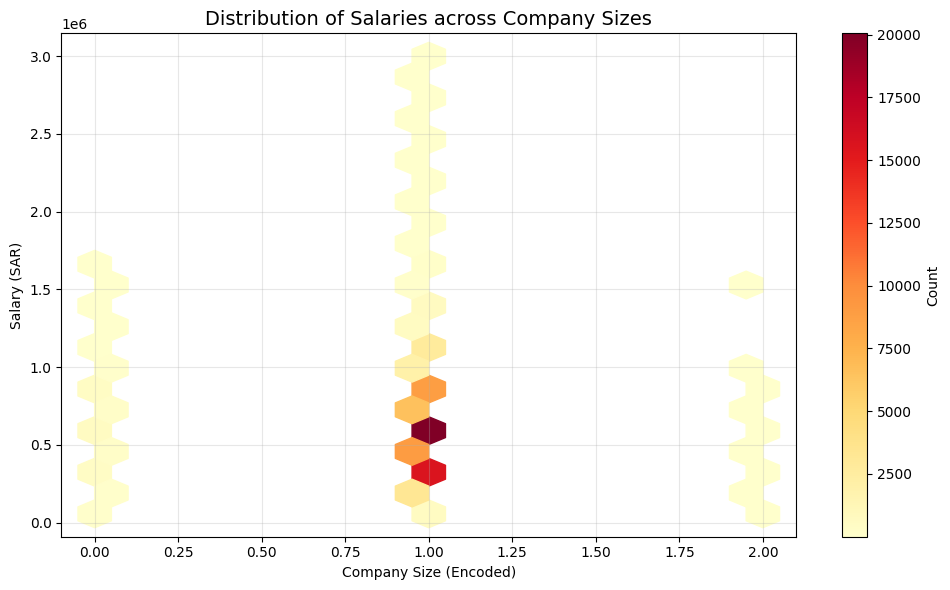

In [36]:
# Plot 2: Hexbin plot - Salary vs Company Size (encoded)
plt.figure(figsize=(10, 6))
hb = plt.hexbin(df['company_size_encoded'], df['salary'], 
                gridsize=20, cmap='YlOrRd', mincnt=1)
plt.colorbar(hb, label='Count')

plt.title('Distribution of Salaries across Company Sizes', fontsize=14)
plt.xlabel('Company Size (Encoded)')
plt.ylabel('Salary (SAR)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

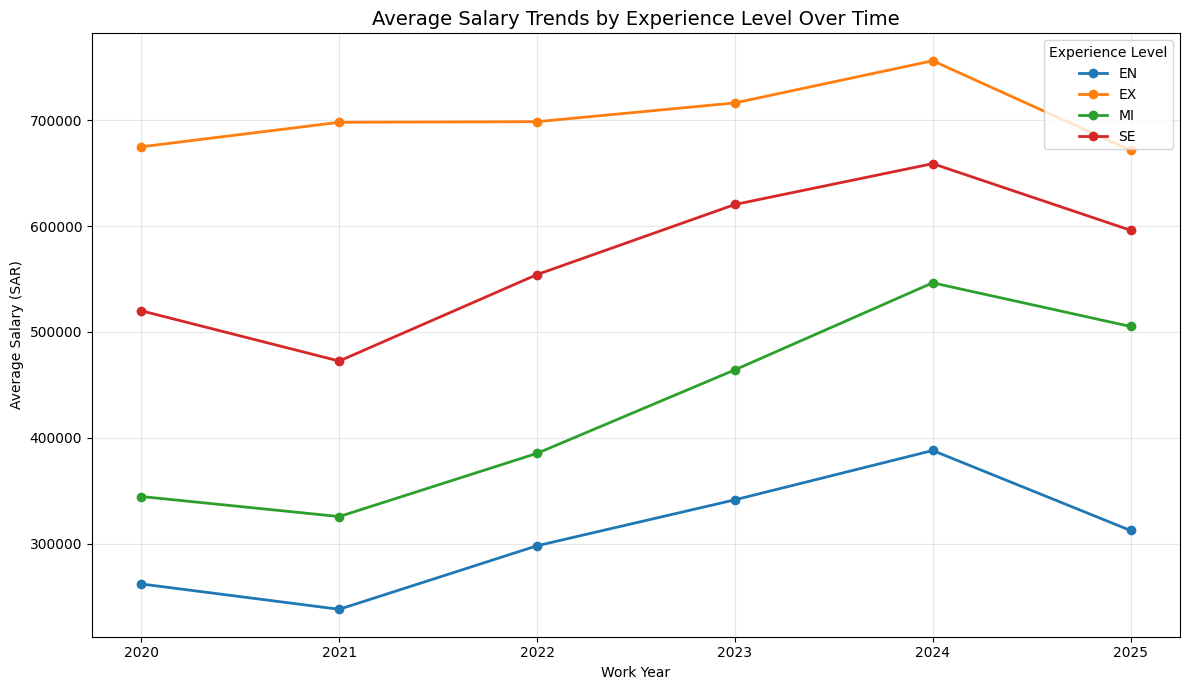

In [37]:
# Plot 3: Bivariate line chart - Average salary by experience level over work year
# First, group and calculate means
salary_by_exp_year = df.groupby(['experience_level', 'work_year'])['salary'].mean().reset_index()

# Create pivot table for plotting
pivot_data = salary_by_exp_year.pivot(index='work_year', columns='experience_level', values='salary')

plt.figure(figsize=(12, 7))
for column in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[column], marker='o', linewidth=2, label=column)

plt.title('Average Salary Trends by Experience Level Over Time', fontsize=14)
plt.xlabel('Work Year')
plt.ylabel('Average Salary (SAR)')
plt.legend(title='Experience Level')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()